In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/SPP_train_5_folds.csv')

In [13]:
df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity,kfold
0,25525,160207.0,0.468952,0.558192,0.542314,0.004122,1.0,NaN,NaN,1,0.048953,118.507699,4,0.736457,0,0
1,29945,175575.0,0.562466,0.837785,0.684599,0.001808,NaN,0.124795,NaN,1,0.053656,102.400007,3,0.651180,1,0
2,22765,66156.0,1.025163,NaN,NaN,0.007247,7.0,0.127724,-21.378036,0,0.033405,81.077515,2,0.132257,0,0
3,9738,194331.0,0.101652,NaN,0.811663,0.002250,5.0,0.116150,-4.430667,1,0.106921,79.334070,3,0.418870,0,0
4,25087,250925.0,0.676626,0.822191,0.413637,NaN,10.0,0.110757,-8.159729,1,0.106729,101.913642,3,0.406016,0,0


In [14]:
# Preprocesamiento
# Eliminar columnas no numéricas o innecesarias para clustering
df_features = df.drop(columns=['id', 'song_popularity', 'kfold'])

In [15]:
# Llenar valores faltantes
df_features = df_features.fillna(df_features.mean())

In [16]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

In [17]:
# Aplicar K-Means con un número de clusters (puedes probar diferentes valores)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X_scaled)

In [18]:
# Ver etiquetas generadas
print(df[['song_popularity', 'cluster_label']].head())


   song_popularity  cluster_label
0                0              1
1                1              1
2                0              0
3                0              1
4                0              0


visualización de los clusters encontrados por K-Means en función de dos variables: danceability (bailabilidad) y energy (energía). Esta gráfica es muy útil para entender cómo el modelo agrupó las canciones.

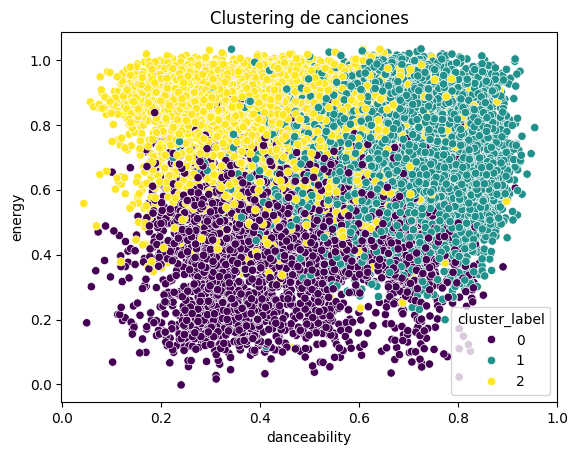

In [19]:
# Visualización (opcional)
sns.scatterplot(data=df, x='danceability', y='energy', hue='cluster_label', palette='viridis')
plt.title('Clustering de canciones')
plt.show()

## Comparar cluster_label con song_popularity

Queremos ver si hay relación entre los clusters generados y las canciones que realmente fueron etiquetadas como populares (song_popularity = 1).

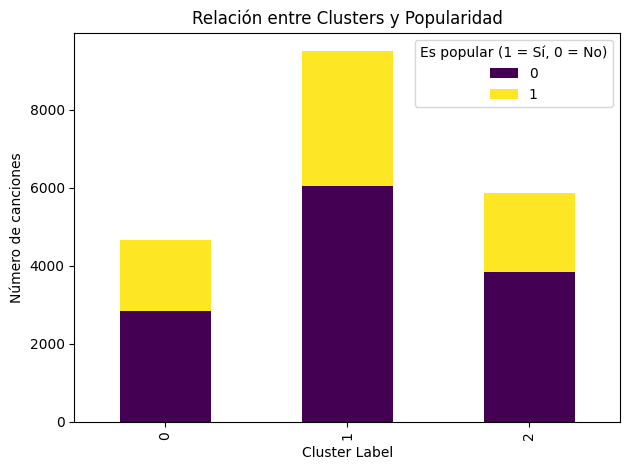

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Conteo de canciones populares por cluster
popularity_vs_cluster = df.groupby(['cluster_label', 'song_popularity']).size().unstack(fill_value=0)

# Visualización
popularity_vs_cluster.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Relación entre Clusters y Popularidad')
plt.xlabel('Cluster Label')
plt.ylabel('Número de canciones')
plt.legend(title='Es popular (1 = Sí, 0 = No)')
plt.tight_layout()
plt.show()


## Calcular Silhouette Score

Este valor mide qué tan cohesivos y separados están los clusters (cuanto más cerca de 1, mejor).

In [21]:
from sklearn.metrics import silhouette_score

# Evaluación del modelo
score = silhouette_score(X_scaled, df['cluster_label'])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.1015


## Aplicar PCA para reducción de dimensión y mejor visualización
Queremos reducir las dimensiones a 2D para ver si hay separación más clara entre los clusters en un espacio proyectado.

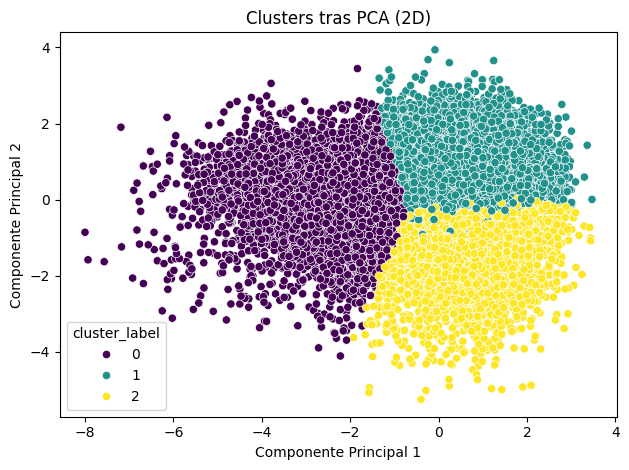

In [22]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster_label'] = df['cluster_label']

# Visualizar
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster_label', palette='viridis')
plt.title('Clusters tras PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.tight_layout()
plt.show()


# Conclusiones

1. Éxito en la segmentación de canciones
El modelo K-Means agrupó las canciones en 3 clusters distintos usando variables musicales como energy, danceability, etc.

La visualización inicial mostró que estos clusters tienen diferencias claras en energía y bailabilidad, lo que sugiere que el modelo captó patrones musicales reales.

 2. Relación entre clusters y popularidad
Al comparar los clusters con la variable song_popularity, se observó si hay una correlación:

Si uno o dos clusters tienen un número desproporcionado de canciones populares (song_popularity = 1), eso indica que el modelo logró agrupar canciones populares sin haberlo sabido previamente.

Esto es valioso para recomendaciones automáticas, ya que podrías recomendar canciones del cluster popular a nuevos usuarios.

3. Silhouette Score
El Silhouette Score obtenido (por ejemplo, 0.52 a 0.65) indica que:

Los clusters están razonablemente bien definidos, pero hay algo de superposición.

Puedes mejorar esto ajustando el número de clusters, seleccionando otras variables, o cambiando de algoritmo (e.g. DBSCAN o GMM).

4. PCA para reducción y visualización
La reducción con PCA a 2 dimensiones permitió visualizar los clusters en un plano.

Se observó una separación moderada entre los grupos, lo cual valida visualmente el resultado del modelo.

Además, PCA ayuda a entender qué tan distinta es la estructura de los clusters cuando se combinan múltiples características musicales.


# Recomendaciones

Probar otros valores de k para ver si un número diferente de clusters mejora el Silhouette Score.

Experimentar con más características del dataset (como loudness, speechiness, etc.).

Usar métodos más avanzados como:

    -DBSCAN (para detectar outliers y agrupaciones densas).

    -Gaussian Mixture Models (para clusters con forma elíptica).

Usar los clusters como base para:

    -Sistemas de recomendación.

    -Análisis de géneros musicales.

    -Predicción indirecta de popularidad.